## In this notebook i have tried to predict the chances of one has heart disease or not  based on various informations collected from the person. I have used 6 classifier algorithm and demonstrated the prediction  accuracy score of each of the 6 algorithms. Relevent graphs are plotted as well. At the end I have plotted a graph showing the performance of the 6 algorithms for comparison.

In [1]:
import sklearn
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go

from matplotlib import style
style.use('ggplot')
%matplotlib inline


import cufflinks as cf    # cufflinks binds pandas with plotly
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=8,5   # this will increase the size of the graphs

import seaborn as sns
import os
from sklearn.metrics import accuracy_score
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import warnings                   # as the name suggests this will ignore all the warnings in this notebook
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix    # to create confusion matrix



#### The plotly Python library (plotly.py) is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.

#### plotly has its own dashboard , however we can use it in our notebook in offline mode.

####  Cufflinks is a third-party wrapper library around Plotly, maintained by Santos Jorge. When you import cufflinks, all Pandas data frames and series objects have a new method attached to them called . iplot() which has a similar API to Pandas' built-in . plot() method.

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
heart = pd.read_csv('heart.csv')  #reading the data and storing in the heart dataframe

In [4]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# description of the vsrious data collected in order to do the prediction.

info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(heart.columns[i]+":\t\t\t"+info[i])


age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [6]:
heart['target']   # looking at the targets

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [7]:
 # grouping all the data by targets. here 138 person don't have heart disease and 165 have the heart disease
heart.groupby('target').size()  

target
0    138
1    165
dtype: int64

In [8]:
heart.groupby('target').sum()    

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,7811,114,66,18547,34650,22,62,19196,76,218.8,161,161,351
1,8662,93,227,21335,39968,23,98,26147,23,96.2,263,60,350


In [9]:
heart.shape

(303, 14)

In [10]:
heart.size    # size = 304*14    reflects total number of data

4242

In [11]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
heart.info()    #knowing the information.  below shows No column has their data as null.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
heart['target'].unique()    # knowing the unique target values. here it's 1 and 0

array([1, 0])

# Visualization

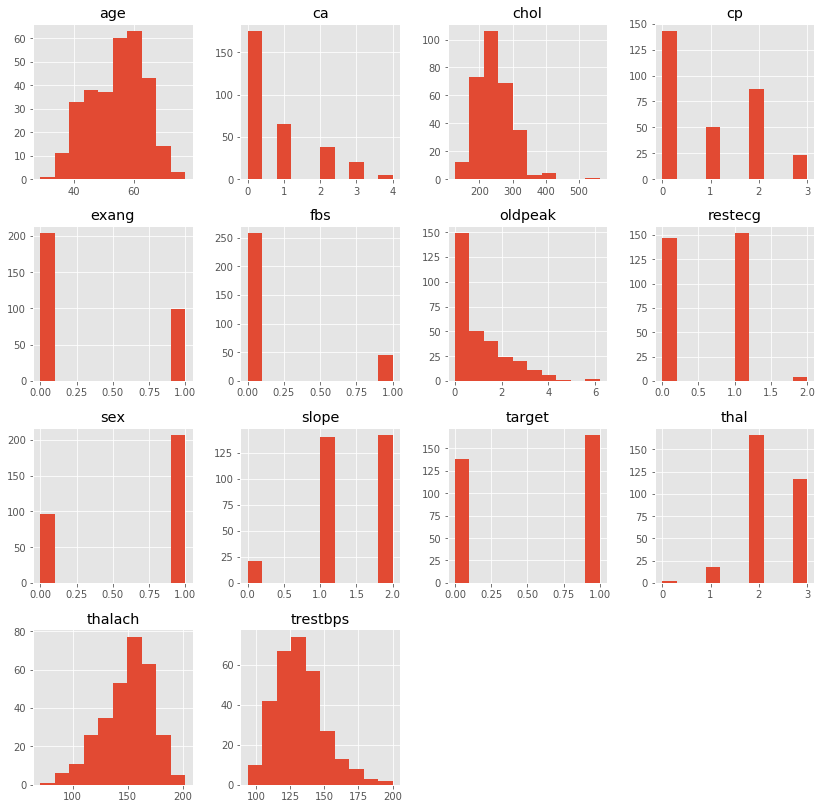

In [14]:
heart.hist(figsize=(14,14))    # plotting the histogram of all the column data
plt.show()

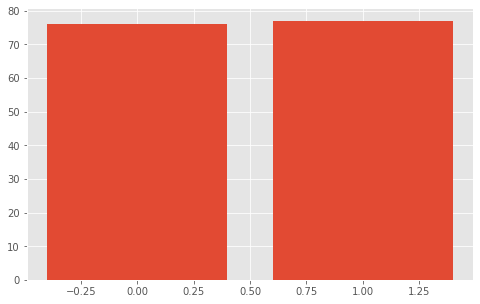

In [15]:
plt.bar(x=heart['sex'],height=heart['age'])   # bar diagram showing sex and age.
plt.show()

In [16]:
#heart.iplot(kind='bar',x='sex',y='age')


In [17]:
#fig=px.bar(heart,x="sex",y="age",color='sex',title='Confirmed cases in India')
#fig.show()

In [18]:
#fig=px.bar(heart,x="sex",y="target",color='sex',title='Confirmed cases in India')
#fig.show()

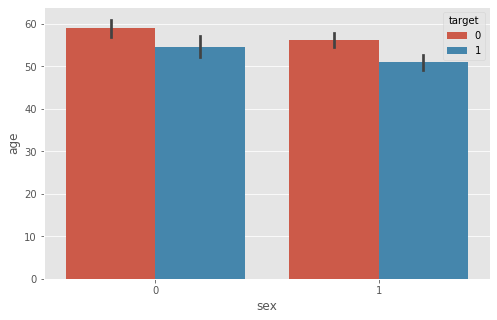

In [19]:
sns.barplot(x=heart['sex'],y=heart['age'],hue=heart['target'])

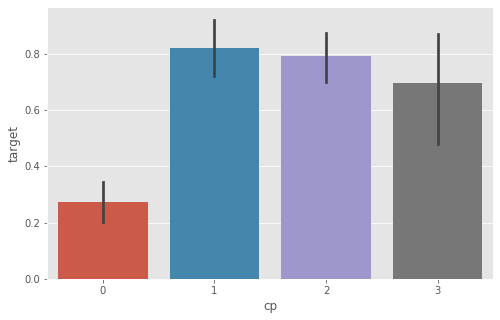

In [20]:
sns.barplot(heart["cp"],heart['target'])

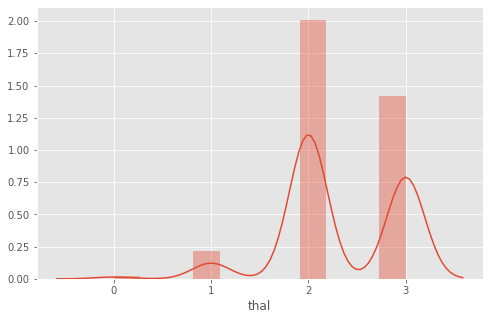

In [21]:
sns.distplot(heart["thal"])

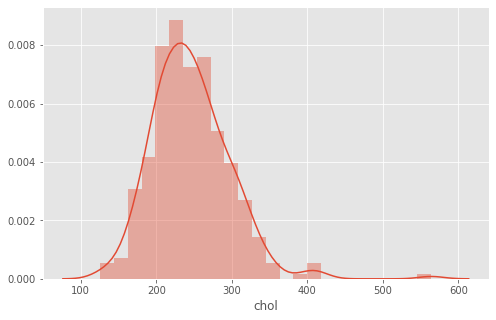

In [22]:
sns.distplot(heart["chol"])

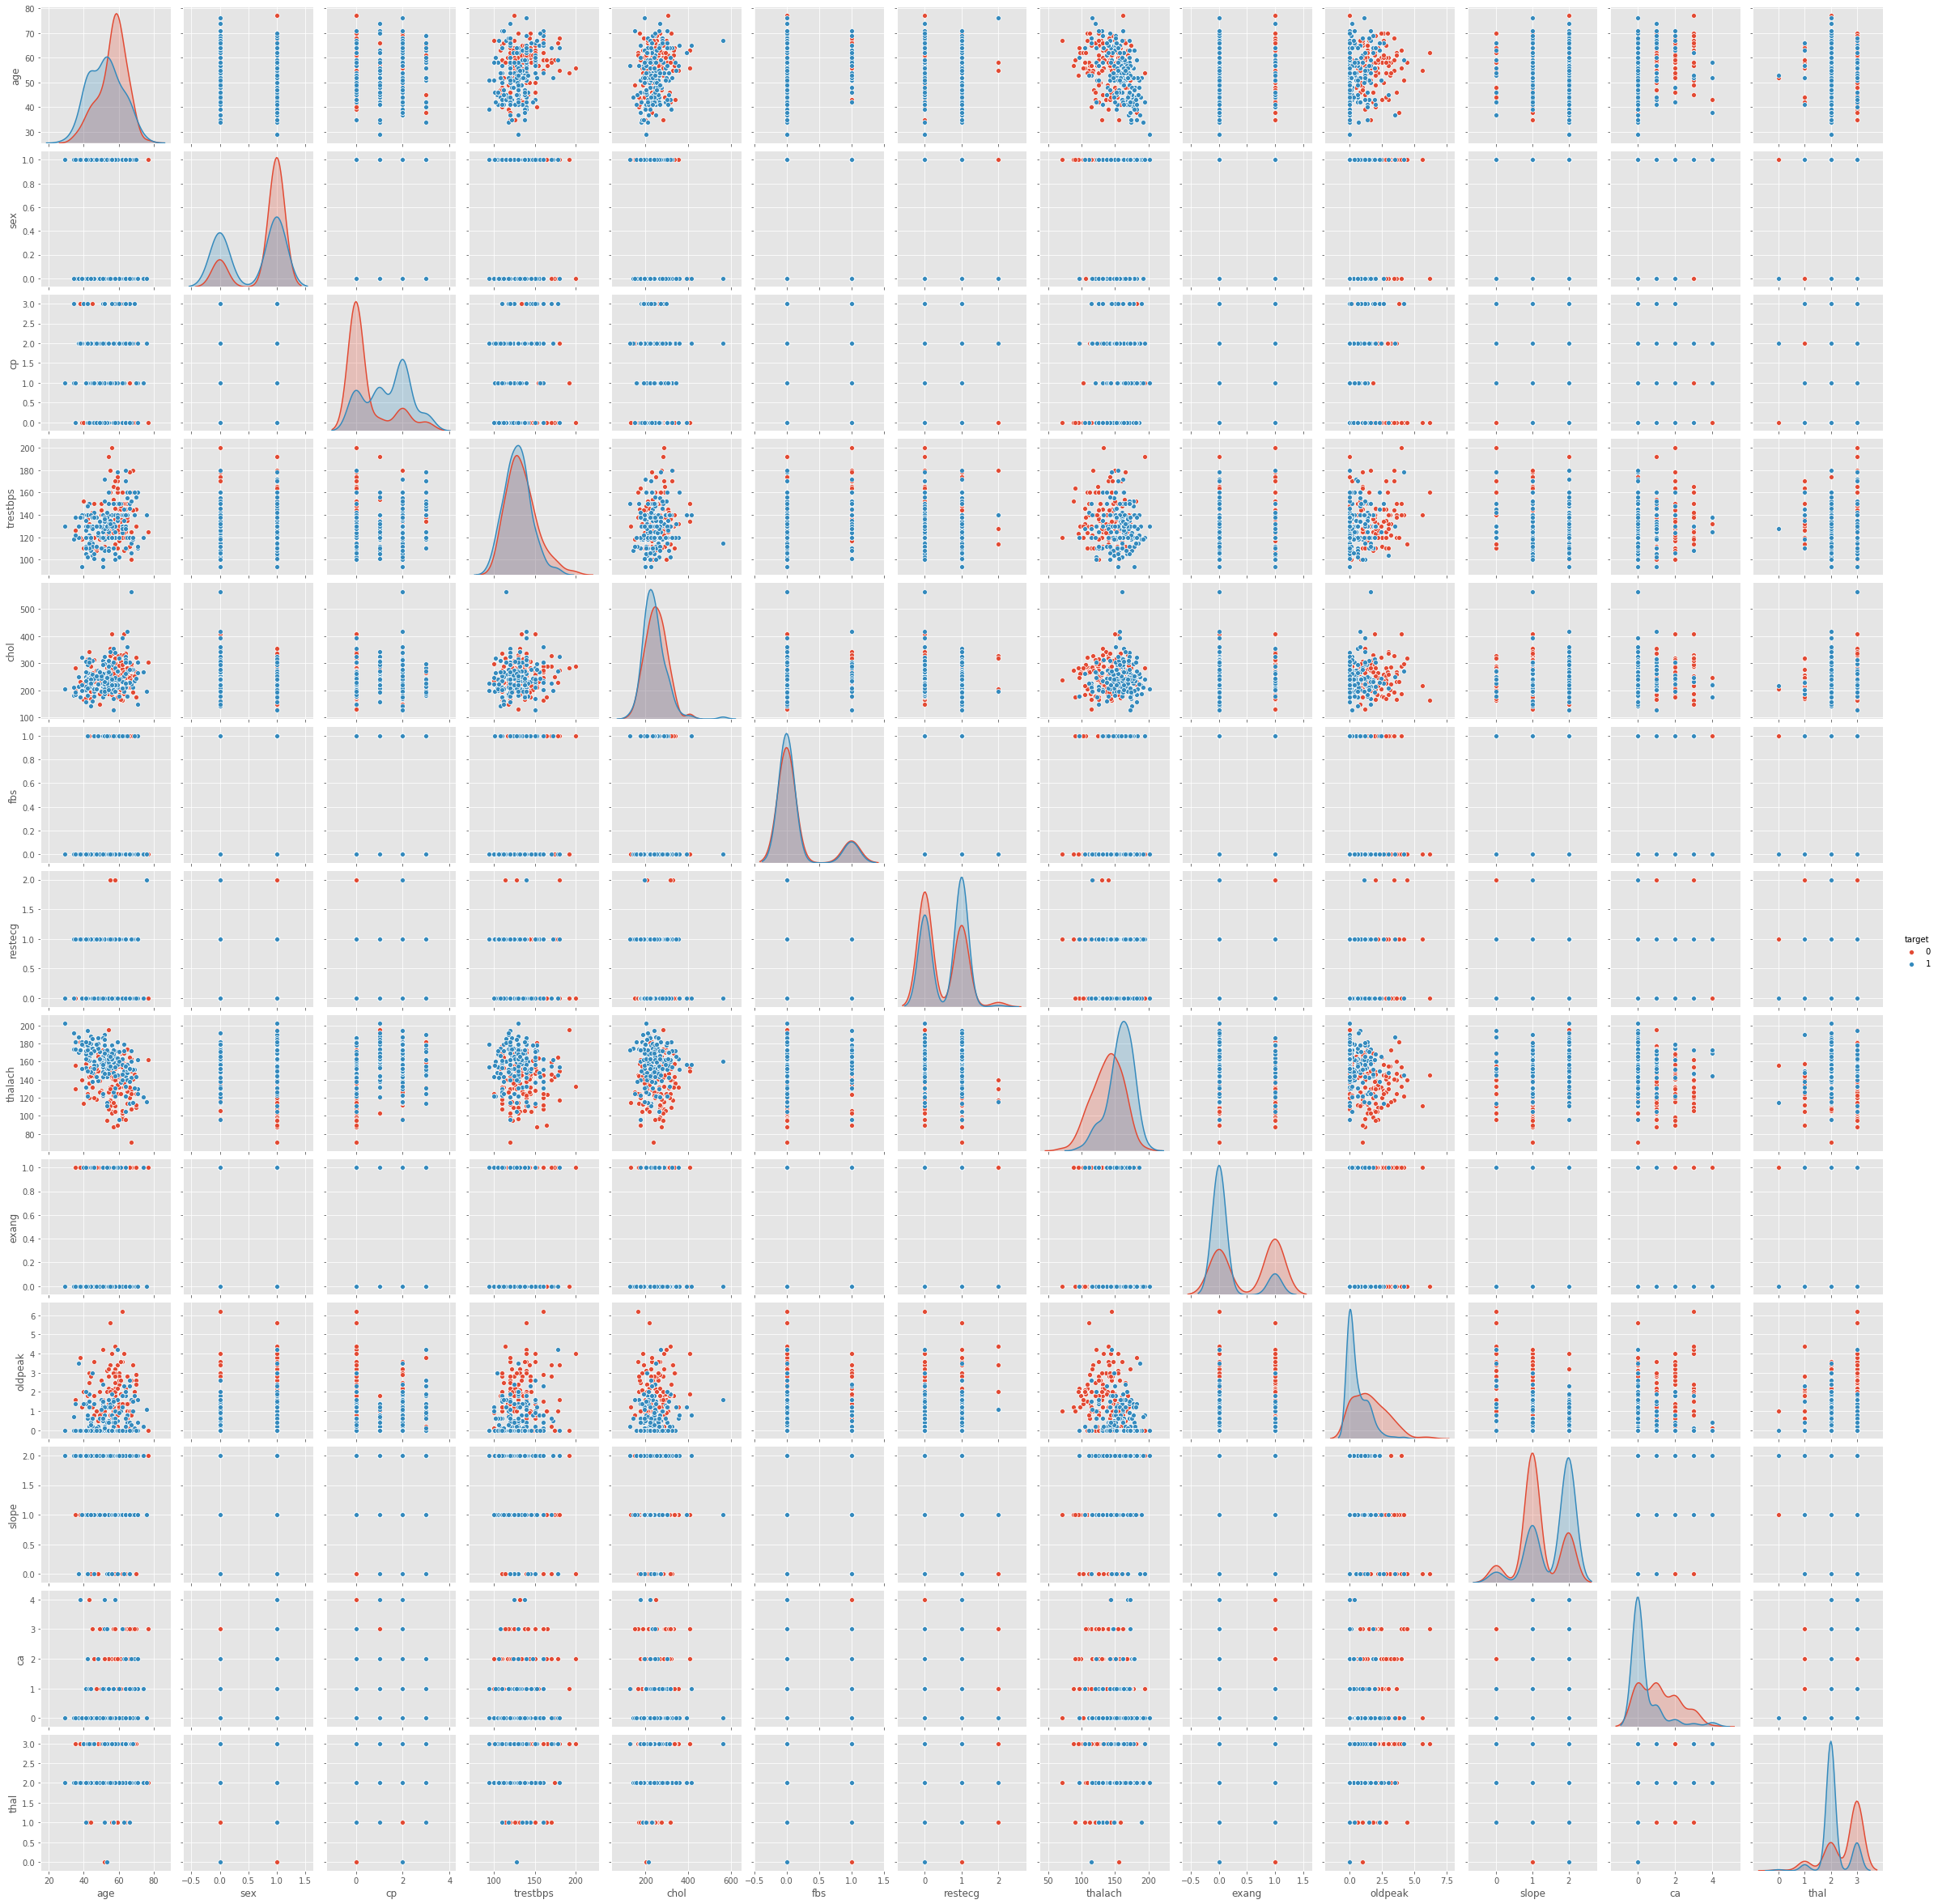

In [23]:
sns.pairplot(heart,hue='target')

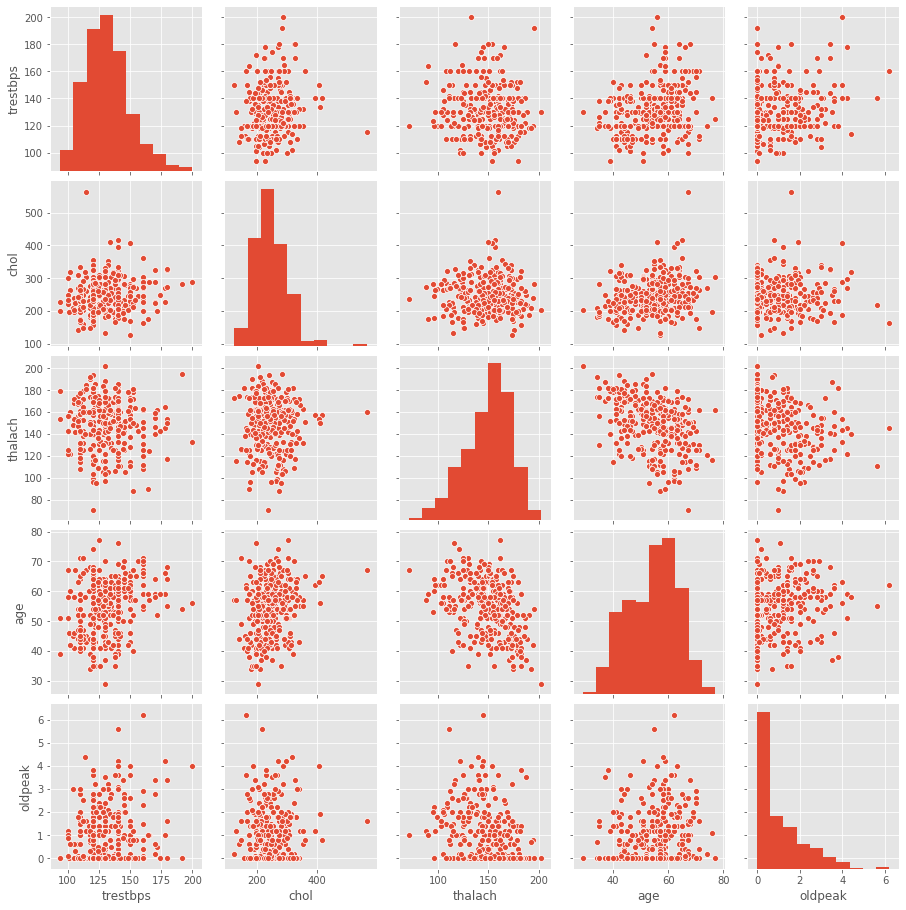

In [24]:
numeric_columns=['trestbps','chol','thalach','age','oldpeak']
sns.pairplot(heart[numeric_columns])

1    165
0    138
Name: target, dtype: int64


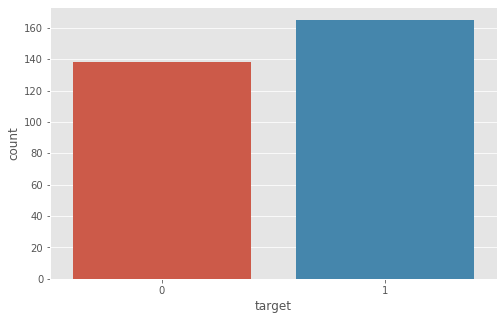

In [25]:
y = heart["target"]

sns.countplot(y)

target_temp = heart.target.value_counts()

print(target_temp)

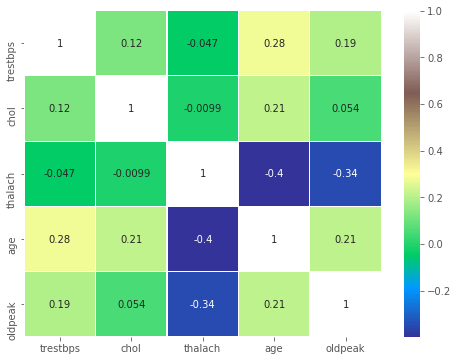

In [26]:
# create a correlation heatmap
sns.heatmap(heart[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

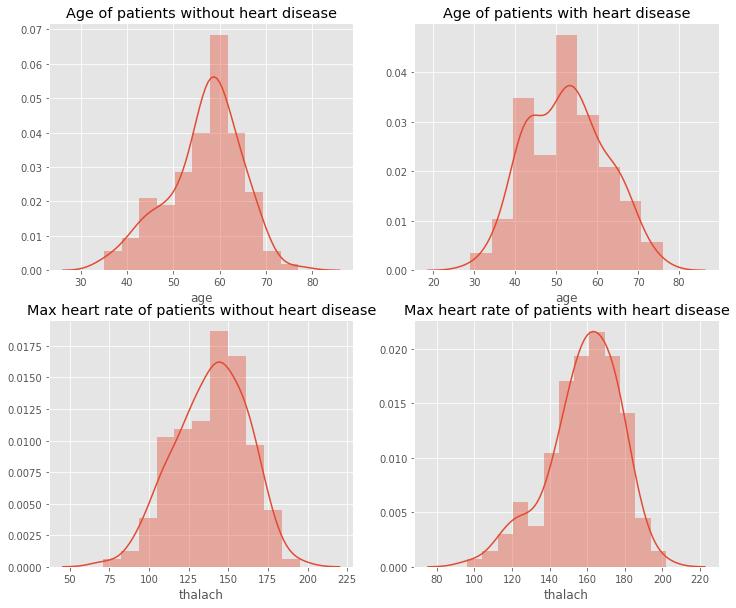

In [27]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(heart[heart['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(heart[heart['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(heart[heart['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(heart[heart['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

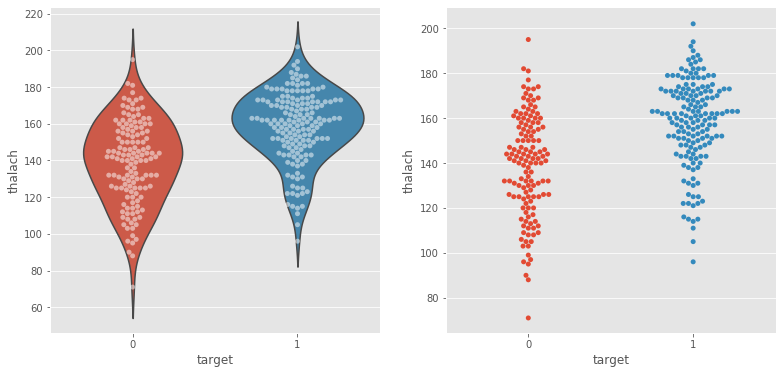

In [28]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(x="target", y="thalach", data=heart, inner=None) # this is for outer structure
sns.swarmplot(x="target", y="thalach", data=heart, color='w', alpha=0.5) # this is for inner dotted points


plt.subplot(122)
sns.swarmplot(x="target", y="thalach", data=heart)
plt.show()

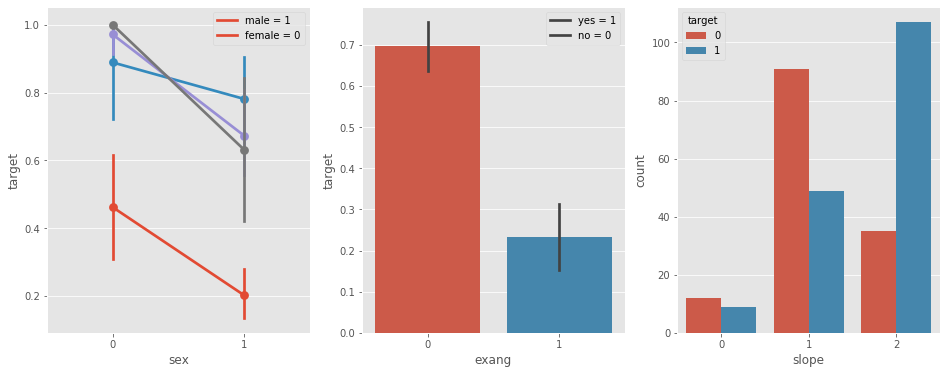

In [29]:
# create pairplot and two barplots
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="sex", y="target", hue='cp', data=heart)
plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="exang", y="target", data=heart)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="slope", hue='target', data=heart)
plt.show()

# Data Preprocessing

#### Before we begin we have to preprocess our data so we don't encounter any irregularities or inconsistency  later while working

In [30]:
heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [31]:
heart['target'].isnull()    #knowing if there are null targets. thankfully we dont have any. else we would
                            # have to either remove those or substitute it explicitly

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: target, Length: 303, dtype: bool

In [32]:
heart['target'].sum()

165

In [33]:
heart['target'].unique()

array([1, 0])

In [34]:
heart.isnull().sum()    # nowing if there are null data . thankfully we dont have any. else we would
                            # have to either remove those or substitute it explicitly

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [35]:
X,y=heart.loc[:,:'thal'],heart.loc[:,'target']  # separatring dependent and independent variables
                                                # X is independent variable while y is dependent.
    # here in y this : suggests select all rows where as target implies select the target column. i.e all rows of target columns

In [36]:
X   # independent variables

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [37]:
y     # dependent variables

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [38]:
y.shape   

(303,)

In [39]:
from sklearn.model_selection import train_test_split   # for splitting the data
from sklearn.preprocessing import StandardScaler   # for feature scaling

In [40]:
#X=heart.drop(['target'],axis=1)

In [41]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [42]:
# splitting into train and test datasets
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

In [43]:
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (212, 13)
train_set_y shape: (212,)
test_set_x shape: (91, 13)
test_set_y shape: (91,)


# Predictions

In [44]:
Catagory=['No...you are alright.you can relax!..'
          ,'Yes you have Heart Disease....Take care of yourself']


## 1)Decision Tree classifier

In [45]:
#X_dt = X.drop(['thal','fbs'],axis=1)

In [46]:
#X_train,X_test,y_train,y_test=train_test_split(X_dt,y,random_state=10,test_size=0.3,shuffle=True)

In [47]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
y_pred = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test,y_pred)*100


In [49]:
accuracy_dt

74.72527472527473

In [50]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.747


In [51]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [52]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0])

In [53]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[32, 18],
       [ 5, 36]])

In [54]:
X_DT=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
X_DT_prediction=dt.predict(X_DT)

In [55]:
X_DT_prediction[0]

1

In [56]:
print(Catagory[int(X_DT_prediction[0])])

Yes you have Heart Disease....Take care of yourself


### Feature importance in decision tree

In [57]:
print("Feature importances:\n{}".format(dt.feature_importances_))

Feature importances:
[0.0396247  0.03461456 0.35775361 0.0904143  0.092912   0.
 0.         0.07801131 0.06667809 0.06566568 0.05635145 0.10975468
 0.0082196 ]


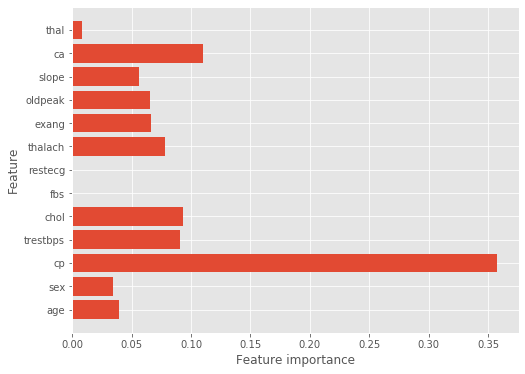

In [58]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(dt)
plt.savefig('feature_importance')

## Feature Scaling

In [59]:
sc=StandardScaler().fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

## 2)K Nearest Neighbour(KNN)

In [60]:
X_test_std

array([[ 0.18111199, -1.35154233, -0.97043553, ..., -0.6067969 ,
         1.33369489,  1.22676132],
       [ 0.39865161,  0.73989544,  0.97963397, ..., -0.6067969 ,
         0.33105902,  1.22676132],
       [ 1.05127045,  0.73989544,  0.97963397, ..., -0.6067969 ,
        -0.67157686,  1.22676132],
       ...,
       [ 0.2898818 ,  0.73989544,  0.97963397, ..., -0.6067969 ,
         0.33105902,  1.22676132],
       [-0.25396724,  0.73989544,  0.00459922, ...,  0.98136289,
        -0.67157686, -0.41927286],
       [ 0.61619122,  0.73989544, -0.97043553, ..., -0.6067969 ,
         1.33369489,  1.22676132]])

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=4,metric = 'minkowski',p=2)
knn.fit(X_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [62]:
y_pred_knn = knn.predict(X_test_std)
accuracy_knn=accuracy_score(y_test,y_pred_knn)*100


In [63]:
accuracy_knn

84.61538461538461

In [64]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test_std, y_test)))


Accuracy on training set: 0.863
Accuracy on test set: 0.846


In [65]:
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[41,  9],
       [ 5, 36]])

In [66]:
k_range=range(1,26)
scores={}
scores_list=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std,y_train)
    y_pred_knn=knn.predict(X_test_std)
    scores[k]=accuracy_score(y_test,y_pred_knn)
    scores_list.append(accuracy_score(y_test,y_pred_knn))

In [67]:
scores

{1: 0.7692307692307693,
 2: 0.8241758241758241,
 3: 0.8241758241758241,
 4: 0.8461538461538461,
 5: 0.8131868131868132,
 6: 0.8131868131868132,
 7: 0.8131868131868132,
 8: 0.8351648351648352,
 9: 0.7802197802197802,
 10: 0.7912087912087912,
 11: 0.7912087912087912,
 12: 0.7802197802197802,
 13: 0.7912087912087912,
 14: 0.8021978021978022,
 15: 0.7802197802197802,
 16: 0.7912087912087912,
 17: 0.7802197802197802,
 18: 0.7802197802197802,
 19: 0.7692307692307693,
 20: 0.7802197802197802,
 21: 0.7802197802197802,
 22: 0.7802197802197802,
 23: 0.7802197802197802,
 24: 0.7802197802197802,
 25: 0.7802197802197802}

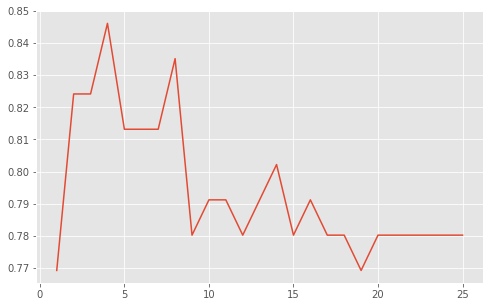

In [68]:
plt.plot(k_range,scores_list)

In [69]:
px.line(x=k_range,y=scores_list)

In [70]:
X_knn=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
X_knn_std=sc.transform(X_knn)
X_knn_prediction=knn.predict(X_knn)

In [71]:
X_knn_std

array([[ 0.94250064,  0.73989544,  1.95466871,  0.75961822, -0.30064937,
         2.37170825, -0.9841849 ,  0.01848325, -0.6723502 ,  1.10653103,
        -2.1949567 , -0.67157686, -2.06530703]])

In [72]:
(X_knn_prediction[0])

1

In [73]:
print(Catagory[int(X_knn_prediction[0])])

Yes you have Heart Disease....Take care of yourself


## 3) Support Vector Machine(SVM)

In [74]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train_std, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [75]:
y_pred_svm=svm_classifier.predict(X_test_std)
accuracy_svm=accuracy_score(y_test,y_pred_svm)*100


In [76]:
accuracy_svm

76.92307692307693

In [77]:
print("Accuracy on training set: {:.3f}".format(svm_classifier.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(svm_classifier.score(X_test_std, y_test)))


Accuracy on training set: 0.873
Accuracy on test set: 0.769


In [78]:
cm = confusion_matrix(y_test, y_pred_svm)
cm

array([[34, 16],
       [ 5, 36]])

In [79]:
X_svm=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
X_svm_std=sc.transform(X_svm)
X_svm_prediction=svm_classifier.predict(X_svm)

In [80]:
X_svm_std

array([[ 0.94250064,  0.73989544,  1.95466871,  0.75961822, -0.30064937,
         2.37170825, -0.9841849 ,  0.01848325, -0.6723502 ,  1.10653103,
        -2.1949567 , -0.67157686, -2.06530703]])

In [81]:
(X_svm_prediction[0])

0

In [82]:
print(Catagory[int(X_svm_prediction[0])])

No...you are alright.you can relax!..


## 4) Kernel SVM

In [83]:
from sklearn.svm import SVC
ksvm_classifier = SVC(kernel = 'rbf', random_state = 0)
ksvm_classifier.fit(X_train_std, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [84]:
y_pred_ksvm=ksvm_classifier.predict(X_test_std)
accuracy_ksvm=accuracy_score(y_test,y_pred_ksvm)*100


In [85]:
accuracy_ksvm

80.21978021978022

In [86]:
print("Accuracy on training set: {:.3f}".format(ksvm_classifier.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(ksvm_classifier.score(X_test_std, y_test)))


Accuracy on training set: 0.929
Accuracy on test set: 0.802


In [87]:
cm = confusion_matrix(y_test, y_pred_ksvm)
cm

array([[35, 15],
       [ 3, 38]])

In [88]:
X_ksvm=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
X_ksvm_std=sc.transform(X_ksvm)
X_ksvm_prediction=ksvm_classifier.predict(X_ksvm)

In [89]:
X_ksvm_std

array([[ 0.94250064,  0.73989544,  1.95466871,  0.75961822, -0.30064937,
         2.37170825, -0.9841849 ,  0.01848325, -0.6723502 ,  1.10653103,
        -2.1949567 , -0.67157686, -2.06530703]])

In [90]:
(X_ksvm_prediction[0])

0

In [91]:
print(Catagory[int(X_ksvm_prediction[0])])

No...you are alright.you can relax!..


## 5) Naive Bayes

In [92]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_std,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [93]:
y_pred_nb=nb_classifier.predict(X_test_std)
accuracy_nb=accuracy_score(y_test,y_pred_nb)*100


In [94]:
accuracy_nb

79.12087912087912

In [95]:
print("Accuracy on training set: {:.3f}".format(nb_classifier.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(nb_classifier.score(X_test_std, y_test)))


Accuracy on training set: 0.849
Accuracy on test set: 0.791


In [96]:
cm = confusion_matrix(y_test, y_pred_nb)
cm

array([[37, 13],
       [ 6, 35]])

In [97]:
X_nb=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
X_nb_std=sc.transform(X_nb)
X_nb_prediction=nb_classifier.predict(X_nb)

In [98]:
X_ksvm_std

array([[ 0.94250064,  0.73989544,  1.95466871,  0.75961822, -0.30064937,
         2.37170825, -0.9841849 ,  0.01848325, -0.6723502 ,  1.10653103,
        -2.1949567 , -0.67157686, -2.06530703]])

In [99]:
(X_nb_prediction[0])

1

In [100]:
print(Catagory[int(X_nb_prediction[0])])

Yes you have Heart Disease....Take care of yourself


## 6) Random forest classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier
randforest_classifier = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',random_state = 0)
randforest_classifier.fit(X_train_std,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [102]:
y_pred_rf=randforest_classifier.predict(X_test_std)
accuracy_rf=accuracy_score(y_test,y_pred_rf)*100


In [103]:
accuracy_rf

80.21978021978022

In [104]:
print("Accuracy on training set: {:.3f}".format(randforest_classifier.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(randforest_classifier.score(X_test_std, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.802


In [105]:
cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[39, 11],
       [ 7, 34]])

In [106]:
X_rf=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
X_rf_std=sc.transform(X_rf)
X_rf_prediction=randforest_classifier.predict(X_rf)

In [107]:
X_rf_std

array([[ 0.94250064,  0.73989544,  1.95466871,  0.75961822, -0.30064937,
         2.37170825, -0.9841849 ,  0.01848325, -0.6723502 ,  1.10653103,
        -2.1949567 , -0.67157686, -2.06530703]])

In [108]:
(X_rf_prediction[0])

1

In [109]:
print(Catagory[int(X_rf_prediction[0])])

Yes you have Heart Disease....Take care of yourself


In [110]:
algorithms=['Decision Tree','KNN','SVM','KSVM','NB','RandomForest']
scores=[accuracy_dt,accuracy_knn,accuracy_svm,accuracy_ksvm,accuracy_nb,accuracy_rf]

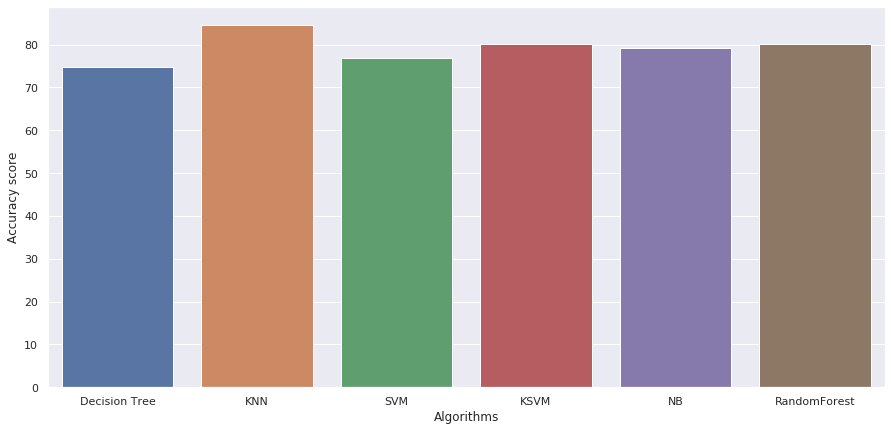

In [111]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)
ax  = sns.barplot(algorithms,scores)

ax.figure.savefig('Different classifier results')

# Conclusion:
### We can conclude that the K nearest neighbour classifier yeilds the best score . i.e 85%  Hence we can use KNN in this scenario to predict if the on the base of the data provided is likely to have heart disease or not.